![IES21](img/logo_ies.png)

# SP2: Con una pequeña ayuda de los vecinos 

# kNN (k Nearest Neighbors) o los k Vecinos Más Cercanos

In [1]:
# Este código sirve simplmente para ocultar el contenido de las celdas con código
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
En este archivo hemos ocultado 
las celdas que contienen código para facilitar su lectura y no es necesario para el contenido de esta materia.
Si Ud. quiere ver el código u ocultarlo, haga <a href="javascript:code_toggle()">click aquí</a>.''')

**Nota:** Si en alguna celda de texto (Markdown) aparece una expresión encerrada entre dos llaves, por favor ejecute la celda haciendo SHIFT + ENTER.   
En Jupyter es posible acceder a variables o ejecutar código aún en las celdas de texto si se las encierra en doble llave. 

In [2]:
# Este es sólo para centrar las celdas con resultados, sino alinea a la izquierda. 
CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

## k-Nearest Neighbors

Características generales:  


- kNN es un método que sirve tanto para Clasificación como para Regresión.
- Fácil de comprender, ya que presenta grandes similitudes con la forma en que actuamos los humanos. Esta característica también facilita la aceptación del método por el resto de las personas.
- El principio subyacente se aplica en múltiples áreas, como decíamos en problemas de Aprendizaje Supervisado de Clasificación y Regresión, pero también se aplica en problemas de clustering en casos de Aprendizaje No Supervisado, e inclusive como parte de problemas de reducción de dimensión.
- No paramétrico, es decir que no aprende ciertos parámetros del Train Set como los $w_i$ de Regresión Lineal.
- No nos brinda una explicación del fenómeno subyacente.
- Es relativamente lento, así que no es útil ante grandes cantidades de observaciones. 
- Sufre el problema de la "maldición de la dimensionalidad" (veremos más adelante qué significa), lo cual significa que pierde efectividad cuando tenemos muchas variables o features (usar hasta 50 variables)
- Se recomienda normalizar las variables antes de usarlo. Por ahora no nos preocuparemos de normalizar, pero después vamos a tener que hacerlo. 

Comencemos con el caso más sencillo.

### 1-Nearest Neighbor o el Vecino Más Cercano

Supongamos que tenemos los siguientes datos para un problema de clasificación

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Aprendizaje_Automatico_1/AAI - SP_2/2-Teoricos/data/knn_01.csv')
df

,x1,x2,y
0,1.00,1.00,no
1,2.00,3.00,no
2,3.00,1.25,si
3,3.80,2.80,si
4,4.20,4.00,no
5,4.75,0.75,no
6,5.00,1.75,si
7,5.50,2.00,no
8,5.25,4.00,no
9,2.00,2.00,no


Como sólo tenemos dos variables, x1 y x2 podremos verlo en un gráfico, asignando colores distintos a los valores del target y, asignemos:  

- para el valor **si** el color **rojo** y    
- para el valor **no** el color **celeste**.

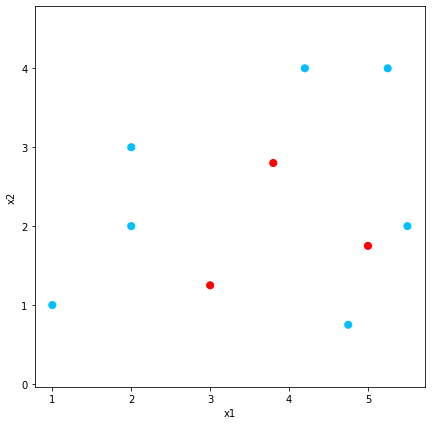

In [ ]:
# Este código no es necesario que lo vea
# Agrego una columna con los colores:
df['colores']=np.where(df.y=='no','deepskyblue','red') # los no  serán celestes; los si, rojos

# Hacemos el scatter plot
fig1=df.plot(kind='scatter', x='x1',y='x2',color=df.colores,figsize=[7,7],marker='o',s=50) # s es el size de los puntos
plt.axis('equal')
plt.show()

In [ ]:
# Queremos clasificar a p1
p1=[3.25,2.5]                    # se puede elegir cualquier otro punto y los gráficos y cálculos posteriores se actualizarán

Supongamos que ahora tenemos una nueva observación, p1, para clasificar, cuyos valores de x1 y x2 son:

x1={{p1[0]}}, x2={{p1[1]}}  

Ubiquemos esta observación en nuestro plano y veamos qué observamos:


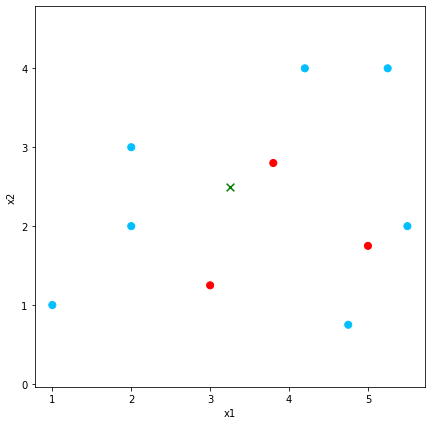

In [ ]:
# Este código no es necesario que lo vea
fig1=df.plot(kind='scatter', x='x1',y='x2',color=df.colores,figsize=[7,7],marker='o',s=50) # s es el size de los puntos
plt.scatter(p1[0],p1[1],color='green',marker='x', s=60)
plt.axis('equal')
plt.show()

La estrategia seguida con **1-Nearest Neighbor o el Vecino Más Cercano** es muy sencilla:  

> Identificar el caso conocido más _**similar**_ o _**más cercano**_ y asignarle la etiqueta que tiene éste.

En este caso la observación más cercana podemos ubicarla visualmente y es la que hemos marcado en el gráfico siguiente:

In [ ]:
# Este código no es necesario que lo vea la primera vez que lee esta clase, más adelante explicaremos cómo funciona.
# Busco las 3 observaciones más cercanas a p1
from sklearn.neighbors import NearestNeighbors
k=3                                  # cantidad de puntos más cercanos que buscamos

neigh=NearestNeighbors(n_neighbors=k)
neigh.fit(df[['x1','x2']])           # pasamos los datos de x1 y x2 solamente
k_distancias, k_cercanos = neigh.kneighbors([p1], 3, return_distance=True)  # deveuelve los índices de las k observaciones más cercanas, y sus distancias

# guardo los k más cercanos en un dataframe usando como índice para seleccionarlos a k_cercanos
df_k_cercanos=df.iloc[k_cercanos[0]]    # tenemos los k puntos más cercanos a p1, si queremos el primero más cercano k_cercanos[0][0]
# df_k_cercanos.iloc[0].x1  así se accedería al valor de x1 del más cercano


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Le voy a agregar las distancias correspondientes en una nueva columna que llamaré distancia. Tira un Warning pero lo hace.
# voy a ocultar el warning
import warnings
warnings.simplefilter('ignore')
# fin del problema del Warning, en algún momento revisar qué le molestaba.

df_k_cercanos['distancia']=k_distancias[0]
#df_k_cercanos

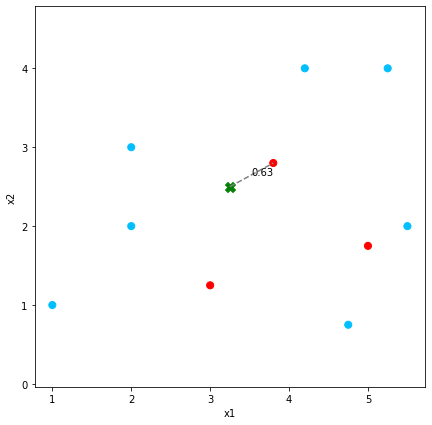

In [ ]:
# Este código no es necesario que lo vea
# Dibujamos el diagrama
fig1=df.plot(kind='scatter', x='x1',y='x2',color=df.colores,figsize=[7,7],marker='o',s=50) # s es el size de los puntos
plt.scatter(p1[0],p1[1],color='green',marker='X', s=100)
plt.plot([p1[0],df_k_cercanos.iloc[0].x1],[p1[1],df_k_cercanos.iloc[0].x2],color='gray',linestyle='--')
texto_x1=(df_k_cercanos.iloc[0].x1-p1[0])/2+p1[0]
texto_x2=(df_k_cercanos.iloc[0].x2-p1[1])/2+p1[1]
plt.text(texto_x1, texto_x2, round(k_distancias[0][0],2))
plt.axis('equal')
plt.show()

Por lo cual el pronóstico para la nueva observación sería rojo (y = si) como el de la observación (punto) conocida más cercana.

> Como comentábamos anteriormente, es muy parecido a la forma en que actuamos los humanos, cuando lo hacemos con cierta racionalidad: ante una situación nueva,  *buscamos en nuestra experiencia pasada* el caso **más similar** que conozcammos y asumimos la misma respuesta. 

En la frase anterior sólo era necesario definir de alguna manera matemática el significado de **similar**, lo cual hemos hecho a través de través de la definición matemática de **distancia**.  

Recordemos de la materia Introducción a la Inteligencia Artificial que podemos definir distancia de diversas maneras, la más habitual (y también la más usada en este contexto) es la distancia euclídea también llamada L2, aunque debemos aclarar que en la aplicación de k-Nearest Neighbors es habitual que debamos probar con otras para obtener los mejores resultados ya que depende del tipo de datos que tengamos.

Cuando estudiamos la materia Introducción a la IA también vimos que al utilizar Árboles de Decisión el equivalente gráfico correspondía a dividir el espacio de las variables (plano en este caso) con líneas rectas **paralelas a los ejes coordenados**, el caso de k-Nearest Neighbor también tiene una interesante interpretación gráfica, para el caso particular de 1-Nearest Neighbor se denomina **Diagramas de Voronoi**

Recordemos cómo hubiera sido la interpretación gráfica del uso del Árbol de Decisiones, es decir cómo hubiera divido el espacio de las variables x1 y x2 sin podar:


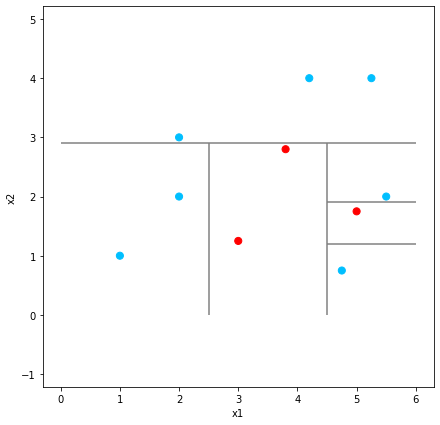

In [ ]:
# Este código no es necesario que lo vea
fig1=df.plot(kind='scatter', x='x1',y='x2',color=df.colores,figsize=[7,7],marker='o',s=50) # s es el size de los puntos

plt.hlines(y=2.9, xmin=0, xmax=6, color='gray')
plt.vlines(x=2.5, ymin=0, ymax=2.9, color='gray')
plt.vlines(x=4.5, ymin=0, ymax=2.9, color='gray')
plt.hlines(y=1.9, xmin=4.5, xmax=6, color='gray')
plt.hlines(y=1.2, xmin=4.5, xmax=6, color='gray')
plt.axis('equal')
plt.show()

#Nota: automatizarlo.

#### Diagramas de Voronoi: división del espacio vectorial de variables para 1-Nearest Neighbor

En un diagrama de Voronoi se marcan las zonas de los puntos más cercanos a cada una de las observaciones, a continuación le mostramos cómo quedaría el diagrama de Voronoi para los mismos puntos anteriores y compárelo con el correspondiente para el árbol:  

Pdta: Python incoropora librerías para facilitar la creción de estos diagramas, pero no es tema de nuestra materia hacer estos diagramas, así que puede ignorar el código siguiente.



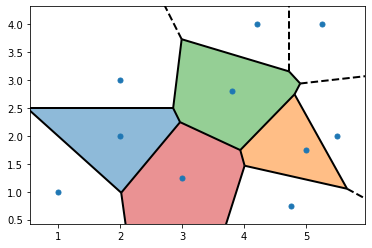

In [ ]:
# No es necesario que vea este código, no forma parte de la materia, pero como me gusta tratar de generar todo 
# programáticamente preferí hacer los cálculos en nvez de copiar un dibujo.

from scipy.spatial import Voronoi, voronoi_plot_2d

# pasamos los puntos (x1,x2)
points=df[['x1','x2']]

# computamos el "teselado de Voronoi" 
vor = Voronoi(points)

# plot
voronoi_plot_2d(vor,show_vertices=False,line_width=2, point_size=10)

# un poco de colorinche
# col='gray'
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.5)

plt.show()

Cada una de las zonas marcadas, denominadas **celdas**, está formada por todos los puntos del plano que se encuentran más cercanos al punto marcado con azul en cada una de las celdas, es decir que a cada punto de una celda se le asignaría la misma categoría que la de la obseración o punto marcado.  Se dice que cada uno de estos puntos tiene "control" dentro de su celda.  

Como puede observar es una forma distinta a la de Árboles de Decisión de subdividir el espacio de las variables. Observe que los bordes son rectos y las celdas son bastante puntiagudas.


Si bien el ejemplo anterior lo desarrollamos para un caso de clasificación, si el problema fuera de regresión, cada uno de los puntos dentro de una celda asumiría el mismo valor numérico que el de la observación que la controla.

> Si lo pensamos un poco el modelo de un solo vecino, al asignar el resultado basándose sólo en una sola observación aunque sea la más cercana, **es muy susceptible a fallar si por ejemplo tenemos ruido,  algunos casos mal clasificados o si tenemos outliers**.  

### Boundary Decision - Frontera de Decision

El concepto de **Boundary Decision o Frontera de Decisión** no se aplica sólo kNN, **es general a todos los casos de Clasificación**, y consiste en visualizar los bordes de las zonas que corresponden a cada uno de los valores de etiquetas o labels.  
Sólo tiene aplicación práctica cuando tenemos 2 variables X o a lo sumo 3 variables X ya que no podemos visualizar más de 3 dimensiones!

Veamos cómo sería la Frontera de Decisión para nuestro ejemplo.  

**Nota:** el código utilizado a continuación no es tema de esta materia.

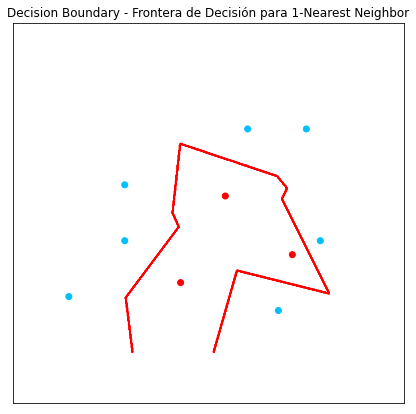

In [ ]:
# No es necesario que vea este código, no forma parte de la materia, pero como me gusta tratar de generar todo 
# programáticamente preferí hacer los cálculos en vez de copiar un dibujo.

# -------------- CODIGO PARA VISUALIZAR LAS FRONTERAS DE DECISIÓN  ------------------

# Primero crear un grid que abarque valores de x1 y x2 a los cuales le vamos a pronosticar, 
# los voy a llamar x1_grid y x2_grid
x1_grid=np.arange(0, 7, 0.01)
x2_grid=np.arange(0,5,0.01)

# Ahora creamos el mesh grid
X1_grid, X2_grid = np.meshgrid(x1_grid, x2_grid)

X=df[['x1','x2']]
y=df[['y']]

# Vamos con el modelo
knn_1=KNeighborsClassifier(n_neighbors=1)  # seteamos 1-Nearest Neighbors

# Le pasamos los datos, "entrenamos" con fit
knn_1.fit(X,np.ravel(y)) # no estoy seguro si esto de ravel() funciona bien pero daba error.
# Pronosticamos el target para todos los puntos del mesh grid que creamos
Z = knn_1.predict(np.c_[X1_grid.ravel(), X2_grid.ravel()])
Z = Z.reshape(X1_grid.shape)

# Los valores de Z (los valores del target) deben ser numéricos, así que los convierto a 1 y 2
Z_num=np.where(Z=='no',1,2)  

# Armamos el diagrama para visualizar
fig, ax = plt.subplots(figsize=[7,7])
CS = ax.contour( Z_num,colors='red')
#ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Decision Boundary - Frontera de Decisión para 1-Nearest Neighbor')

# Agregamos los puntos originales para que se vea quiénes originan los bordes.
plt.scatter(df.x1*100, df.x2*100,color=df.colores)  # en algún momento multiplica las valores de los ejes x1 y x2 por 100
                                                    # por eso al agregar los puntos originales multiplico su valor por 100

plt.gca().axes.get_yaxis().set_visible(False) # oculta la escala del eje y
plt.gca().axes.get_xaxis().set_visible(False) # oculta la escala del eje x
plt.axis('equal')
plt.show()

Ahora que tenemos a la vista, podemos ver que cualquier nueva observación que quedara dentro del borde rojo, sería pronosticada como rojo = si.

### k-Nearest Neighbors

Una forma de mitigar los problemas mencionados (ruido, errores en la algunas clasificaciones, outliers) es no utilizar un solo vecino cercano, sino 2,3,5 (5 suele ser el valor por defecto de las implementaciones),10,100, ... o los "k" vecinos más cercanos.  

> Si el problema es de clasificación podemos decidir qué etiqueta asignar por un sistema de **votación**: es decir la etiqueta que aparezca más veces entre los k vecinos más cercanos.  

> Si el problema es de Regresión podríamos promediar los valores de y (target) que corresponden a cada uno de los k vecinos más cercanos. 

De esta manera conseguiremos disminuir los efectos que el ruido, las malas clasificaciones o lo outliers podrían causar.

Para ejemplificar con el mismo caso anterior, supongamos que  elegimos un valor de **k=3**, es decir que vamos a buscar las 3 observaciones más cercanas a la observación que deseamos clasificar y luego contaremos la etiqueta que aparezca más veces y la asignaremos a la observación a pronosticar:



In [ ]:
#df_k_cercanos

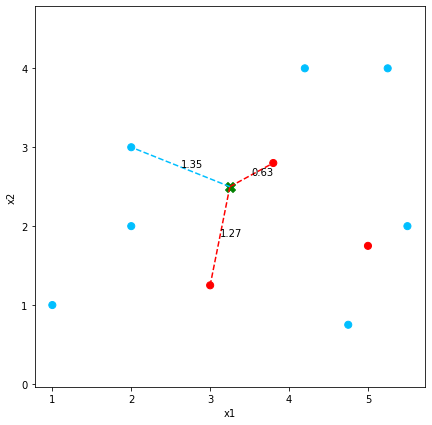

In [ ]:
# Este código no es necesario que lo vea
fig2=df.plot(kind='scatter', x='x1',y='x2',color=df.colores,figsize=[7,7],marker='o',s=50) # s es el size de los puntos
plt.scatter(p1[0],p1[1],color='green',marker='X', s=100)

for i in np.arange(0,3):
    # graficamos el segmento sobre el que medimos la distancia
    # ya que tengo guardado el color de cada punto, le asigno el mismo color para la línea.
    plt.plot([p1[0],df_k_cercanos.iloc[i].x1],[p1[1],df_k_cercanos.iloc[i].x2],color=df_k_cercanos.iloc[i].colores, linestyle='--')
    
    # sólo para mostrar un texto con la distancia
    # ubicamos el punto central de cada segmento
    texto_x1=(df_k_cercanos.iloc[i].x1-p1[0])/2+p1[0]   # coordenada x1 del texto
    texto_x2=(df_k_cercanos.iloc[i].x2-p1[1])/2+p1[1]   # coordenada x2 del texto
    # lo escribimos
    plt.text(texto_x1, texto_x2, round(df_k_cercanos.iloc[i].distancia,2)) # busco el valor de la distancia y lo paso

plt.axis('equal')
plt.show()

Los {{k}} puntos más cercanos son:  

{{df_k_cercanos}}

In [ ]:
df_k_cercanos['y'].unique()

array(['si', 'no'], dtype=object)

In [ ]:
# Solo para ver quién ganó. Todo esto después lo hace una sola función de sklearn.
q_si=len(df_k_cercanos[df_k_cercanos.y=='si'])
q_no=len(df_k_cercanos[df_k_cercanos.y=='no'])

if q_si > q_no:
    ganador='si'
    
elif q_si < q_no:
    ganador='no'
    
else:
    ganador='empate'

In [ ]:
ganador

'si'

Finalmente para este caso de Regresión tenemos:  

- {{q_si}} votos por el si (rojos)  
- {{q_no}} votos por el no (celestes)

por lo cual se asignaría la etiqueta **{{ganador}}** a la nueva observación.



> Si hubiera sido un problema de **Regresión**, el mecanismo más sencillo para asignar un valor numérico es **calcular el promedio de los valores correspondientes a las {{k}} observaciones** (en ese caso los valores de y hubieran sido numéricos y no categorías).  

> Como podemos observar **asignar el valor correcto para k es el punto crítico de este método**, y así es en la realidad ... así que ya puede ir pensando que deberemos afinar el valor de este **hiperparámetro**, pero eso más adelante. 


#### Comentarios:  

- En general es **preferible usar un valor de k mayor a 1**. La mayoría de los algoritmos, como el de sklearn, usan por defecto k=5, aunque eso no significa que *necesariamente* sea el mejor valor.  

- Cuando usamos valores de k pequeños las zonas o celdas se ven como las de un Diagrama de Voronoi, con puntas y cortes abruptos, generalmente pensamos que la realidad no es tan abrupta. Cuando usamos valores de k grandes los bordes tienden a hacerse más suaves, pero comienza a aumentar la posibilidad de caer en overfitting.  

- Con kNN **el problema central es elegir el valor adecuado de k**, lo cual puede resolverse aplicando las reglas de **Selección de Modelo** que aprendimos en Introducción a la IA, es decir usando Validación, creando  el Validation_Train y Validation_Test con el objetivo de comparar los resultados obtenidos para distintos valores del parámetro k, y elegiendo el que nos da mejores resultados.  

  





#### Radius Nearest Neighbors 

- Existe un modelo de Nearest Neighbors que **no** se basa en elelgir los k vecinos más cercanos, sino en elegir un **radio de cercanía**, en este caso se utilizan todos los puntos que estén dentro de ese radio con centro en el punto que queremos pronosticar. Dependiendo de la densidad de puntos que haya en cada zona, puede que sean pocos o muchos los puntos que se consideren cercanos. Si bien puede parecer un avance, ya que no tenemos que elegir k ... tenemos exactamente **la misma dificultad en elegir el valor del radio**!  

- Este modelo basado en el radio **no debe elegirse si tenemos una gran cantidad de variables**, ya que se ve afectado fuertemente por el problema de **La Maldición de la Dimensionalidad (The Curse o Dimensionality)**

#### La Maldición de la Dimensionalidad (The Curse o Dimensionality)


Esta maldición de la dimensionalidad se refiere a que dada una cantidad de puntos (en nuestro caso serían las observaciones), **cuanto mayor es la dimensión del espacio** (en nuestro caso la cantidad de variables predictivas), **más alejados estarán los puntos**.  

Para entender el problema, supongamos que tenemos n=100 puntos al **azar** sobre un segmento (dimensión 1)  centrado en el 0 y de radio 1 (es decir que se extiende desde -1 hasta 1), como se muestra en la siguiente figura:

In [ ]:
n=100

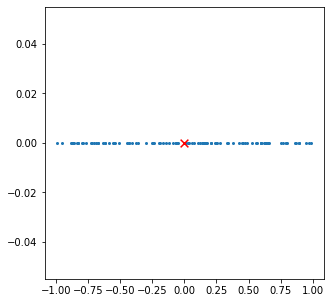

In [ ]:
# Este código es sólo para mostrar la figura siguiente, puede ignorarlo, ya que no es tema de esta materia.
z1=np.random.random(n)*2-1
z2=np.zeros(n)
plt.figure(figsize=(5, 5))
plt.scatter(z1, z2, s=4)
plt.scatter(0,0,color='red',marker='x', s=60)
plt.show()

Pensemos en el punto que está justo en el centro, que es el 0, marcado con una X roja.  

Ahora le pregunto, de los n={{n}} puntos, cuántos están a una distancia a lo sumo  1 del centro, (lo cual equivaldría a preguntar cuántos están cerca)?  

Quizá le confunda la pregunta porque la respuesta es un tanto obvia, **todos los puntos** están a lo sumo a una distancia 1 del centro! Es decir todos los puntos están "cerca" del centro. 

Ahora veamos qué pasa si aumentamos la dimensión a este problema. Veamos qué pasa cuando el espacio es de dimensión 2, lo cual para nosotros significaría que tenemos 2 variables predicitvas. 

Elijamos también n={{n}} puntos al azar, extendámonos 1 unidad para cada lado (arriba, abajo, izquierda y derecha), lo cual nos generaría un rectángulo de lado 2, y pensemos en el punto que está justo al centro del rectángulo, marcado con una X roja. Qué puntos estarían a una distancia = 1 de él?   
Pues los que están dentro de una circunferencia con centro en él y de radio = 1, como se muestra en la siguiente figura:

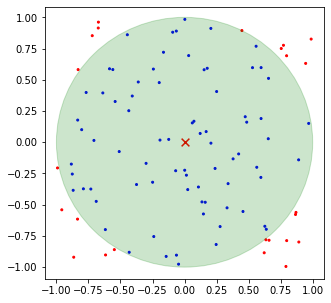

In [ ]:
# Este código es sólo para mostrar la figura siguiente, puede ignorarlo, ya que no es tema de esta materia.
#%matplotlib notebook

z2=np.random.random(n)*2-1
plt.figure(figsize=(5, 5))
colores=np.repeat('blue', 100)
for i in np.arange(0,n):
    if z1[i]**2+z2[i]**2>1:
        colores[i]='red' # si está afuera de la esfera, es rojo
plt.scatter(z1, z2, s=4, color=colores)

circulo=plt.Circle((0,0),1,fill=True, alpha=0.2, color='green')
plt.scatter(0,0,color='red',marker='x', s=60)
plt.gcf().gca().add_artist(circulo)
plt.show()

Ahora, la misma pregunta de antes, cuántos de esos puntos están a lo sumo a una distancia de 1 del centro?   

Podemos ver que ahora **no** están todos, algunos están afuera!  
Aumentamos la dimensión y disminuyó la cantidad de puntos que están "cerca", digamos a una distancia de 1 del centro!  

De hecho, si se pone a contar, debería haber aproximadamente 78 puntos cerca del centro y unos 22 puntos fuera de la circunferencia, es decir "lejos" del centro.   

Cuéntelos.

Cómo lo supimos? Como los puntos fueron seleccionados al azar, pudieron caer en cualquier parte dentro del rectángulo, y la relación entre las superficies del círculo y la del recántgulo debería ser la probabilidad de que un punto caiga, al azar, dentro del círculo. Fíjese:  

El rectángulo tienen lado $l=2$, por lo que su superficie es lado al cuadrado: $ l^2= 2^2 =4$  

Por otro lado el círculo es de radio $R=1$ y la superficie del círculo es $ \pi.R^2 = \pi . 1^2 = \pi$  

Si dividimos la superficie del cículo en la del rectángulo que lo contiene nos daría: $$ \frac{\pi}{4} =0.785$$ {{np.pi/4}} 

Así que existe una probabilidad de 0,785  que un punto *elegido al azar* esté dentro de la circunferencia, o lo que es lo mismo, el 78,5% de los puntos estarán dentro del círculo, por eso supuse al principio que habría unos 78 puntos dentro y unos 22 puntos fuera del círculo. Comentario: sabía que este método se podría usar y de hecho se usa para estimar por ejemplo el valor de pi, sólo debemos generar los puntos al azar? Interesante, no es cierto. Pero volvamos a lo nuestro.


Ahora veamos qué pasa si aumentamos la dimensión de nuestro espacio a 3 , es decir como si tuviéramos 3 variables predictivas. 


Seguimos con la misma cantidad de puntos de antes, pero ahora en vez de tener un rectángulo, tendríamos un cubo, de lado=2, centrado en el origen, y los puntos cercanos, es decir los que se encuentran a distancia a lo sumo 1 del centro serían los que están dentro de una esfera de radio 1, como se muestra en la figura siguiente (el gráfico es interactivo, así que puede rotarlo si lo desea): 

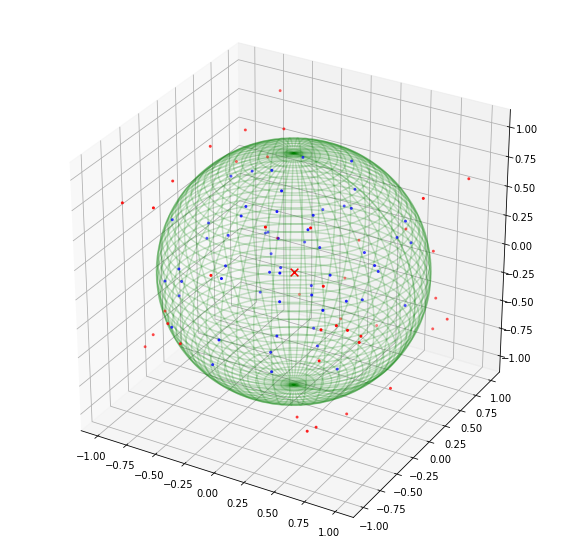

In [ ]:
# Este código es sólo para mostrar la figura siguiente, puede ignorarlo, ya que no es tema de esta materia.
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(u), np.sin(v))+0
y = 1 * np.outer(np.sin(u), np.sin(v))+0
z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))+0
#ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='green', alpha=0.2) # para hacer toda la superficie

z3=np.random.random(n)*2-1

plt.scatter(0,0,color='red',marker='x', s=60)    # agrego el centro

ax.plot_wireframe(x, y, z, color='green', alpha=0.2) # sólo la estructura de alambre.

colores=np.repeat('blue', 100)
q=0
for i in np.arange(0,n):
    if z1[i]**2+z2[i]**2+z3[i]**2>1:
        colores[i]='red' # si está afuera de la esfera, es rojo
        q=q+1
    
ax.scatter(z1, z2, z3, s=4, color=colores)  # agrego los puntos al azar
plt.show()

Cuántos puntos están ahora "cerca" del centro? Se anima a contarlos? A mí me cuesta un poco, aunque en la figura se los coloreé (en rojo los de afuera de la esfera y en azul los interiores), pero si se convenció de nuestros métodos matemáticos anteriores, deberíamos pensar que tendríamos que calcular la relación entre el volumen de la esfera y el de cubo donde se encuentra inscripta para obtenerlo.   

Hagámoslo.

El cubo tiene lado $l=2$ y  volumen del cubo es: $ l^3 = 2^3 = 8$  

Quizá no recuerde la fórmula para calcular el volumen de una esfera, pero era: $ \frac{4}{3}\pi R^3$, como el radio de nuestra esfera es 1, el volumen de nuestra esfera es: $ \frac{4}{3}\pi$

Encontremos la razón entre ambos dividiendo el volumen de la esfera sobre el del cubo:  

$ \frac{\frac{4}{3}\pi}{8} = \frac{\pi}{6} = 0.523 $  

Es decir que la esfera ocupa sólo el 52,3% del volumen del cubo que la contiene, así que habrá sólo unos 52 puntos cerca del centro y 48 alejados!

En dimensión 1, todos los puntos estaban cerca del centro, en dimensión 2, bajó al 78% y en dimensión 3, cayó al 52% !. La relación sigue decreciendo a medida que aumenta la dimensión.  

Así que hemos visto que  

> **cuantas más variables predictivas tenemos, los puntos tienden a estar más alejados**,  

**lo cual hace inviable usar la estrategia del radio para los vecinos cercanos cuando la dimensión es alta**, porque puede ser que no tengamos vecinos dentro del radio elegido!  


#### Otra consecuencia de la Maldición de la Dimensionalidad  

Le hemos dedicado un cierto tiempo a esta "maldición" porque además de ser un problema para el uso del modelo del Radio para los Vecinos Cercanos, hay otra consecuencia, aún más importante que la anterior, otra conclusión que es válida **para todos los modelos de Machine Learning**:  

En todos los modelos de ML, de una u otra manera dependemos de alguna noción de similitud, o cercanía para hacer nuestros pronósticos y si al aumentar la cantidad de variables predictivas es decir al aumentar la dimensión del espacio, las observaciones tienden a estar más separadas, tiende a bajar la "densidad" de observaciones y entorpecerá a cualquier algoritmo que utilicemos. Es por eso que: 

> Deberemos ser prudentes con la cantidad de variables predictivas de nuestros modelos, si es posible desechar las que no aportan mucha información, deberemos hacerlo. Si no podemos deshacernos de ellas, **es muy probable que para mejorar el rendimiento de nuestros algoritmos debamos aumentar la cantidad de observaciones** (lo cual equivaldría a aumentar los puntos en el gráfico anterior). También existen métodos para reducir la dimensionalidad de nuestro problema perdiendo la menor cantidad de información posible, como por ejemplo PCA, más adelante aprenderemos estos métodos que formarán parte del **preprocesamiento** que podremos hacer a los datos. 

Más adelante haremos ejercicios prácticos, mientras tanto le comento que los nombres de los modelos que usa Scikit-learn son:  

**Para Clasificación:**  

- KNeighborsClassifier      --> hay que seleccionar k
- RadiusNeighborsClassifier --> hay que seleccionar el radio

**Para Regresión:**  

- KNeighborsRegressor       --> hay que seleccionar k
- RadiusNeighborsRegressor  --> hay que seleccionar el radio
 



#### BigO (O mayúscula): Tiempos de Procesamiento y  kNN 

Recordemos cómo se procede con Regresión Lineal, y comparémoslo con kNN.   

En regresión lineal **primero** *entrenamos al modelo para aprender el valor de los coeficientes o parámetros $w_i$*, dependiendo de la cantidad de observaciones este aprendizaje puede llevar más o menos tiempo, pero una vez que conocemos el valor de los parámetros, es decir conocemos 

$$ h(x) = w_0 + w_1 x_1 + ...+ w_m x_m $$   

es **muy rápido** para aplicarlo a cualquier nueva observación, ya que sólo deberá hacer unas pocas multiplicaciones y sumas, por eso es un modelo muy usado para pronósticos en tiempo real (todas las plataformas de Big Data proveen su implementación).  

En cambio en kNN no se aprende ningún conjunto de parámetros que después faciliten en cálculo, en cambio para cualquier nueva observación para la que queramos pronosticar el resultado, deberemos pasar por el proceso de calcular **todas las distancias** entre la nueva observación con **todos** los puntos previamente conocidos, para elegir las k más cercanas y recién después hacer la votación o el promedio entre éstos últimos. Se suele decir que kNN es un método **Lazy** (perezoso) porque justamente no aprende primero para aplicar después.  

Una consecuencia de ésto es que es bastante lento para aplicar cuando tenemos muchos datos conocidos.  

En ciencias de la computación se establece algunas formas para indicar cuán veloz o lento es un proceso informático, una de estas maneras es la nomenclatura de la $O$ mayúscula ($BigO$).   

En el caso de kNN, a la hora de pronosticar, como habrá que calcular la distancia del nuevo punto con todos los anteriores, podemos decir que el tiempo de cómputo será *proporcional a la cantidad de observaciones*, es decir si tuviéramos el doble de observaciones, demoraríamos aproximadamente el doble de tiempo.  
Si denominamos con n a la cantidad de observaciones, usando la nomenclatura, se dirá que es tiempo de cómputo es:  $O(n)$, que siginifica simplemente que es proporcional a n ... pero si además pensamos que para calcular cada una de las distancias tendremos que efectuar cálculos con todas las variables predictivas, si tenemos m variables predictivas, entonces si tuviéramos el doble de variables predictivas, demoraríamos aproximadamente el doble de tiempo, por lo cual el tiempo de cómputo también es proporcional a la cantidad de variables, por lo cual para kNN:  

$$ O(n.m)$$  

el tiempo de cómputo para pronosticar es proporcional al producto de n . m. 

Es por eso que decimos que kNN es un método **lento** para pronosticar. Por supuesto si nuestro proceso no necesita súper velocidad, no habrá problema, pero no lo recomendaríamos para un proceso online de Big Data con millones de datos conocidos.  

**Nota**: Otros casos típicos de tiempos de procesamiento suelen ser: 

- $ O(n^2) $ en este caso estamos hablando de un proceso que crece con el cuadrado de n, 
- $ O(n^3) $ en este caso estamos hablando de un proceso que crece con la tercer potencia de n (peor que el anterior), 

los dos anteriores son casos polinómicos, a veces hay casos peores: 

- $ O(2^n) $ este sería un caso **exponencial**, es decir que si aumenta n, el tiempo aumenta mucho, mucho, más que polinómicamente, es de las peores situaciones que podríamos enfrentar (De hecho Google y otras grandes empresas de tecnología puede pagarle una verdadera fortuna si es capaz de transformar algún problema $O(2^n)$ de los que enfrentan cotidianamente en un problema $O(n^2)$). 

Aún peor podría ser:  

- $ O(n^n) $, crecimiento aún más veloz, expopotencial!

También hay casos más *leves* como: 

- $ O(log(n) ) $, es decir un crecimiento logarítmico. La función logarítmica crece más lento que las polinómicas. 
- $ O(\sqrt n ) $, es decir un crecimiento con la raíz cuadrada. La función raiz cuadrada crece más lenta que las polinómicas.


### Preguntas para pensar: 

Las respuestas están al final del archivo.

#### Pregunta 1: **El caso "naif"**.  

Supongamos que contamos con N observaciones, qué pasaría en un problema de Clasificación y en un problema de Regresión si aplicamos kNN y tomamos *justamente* k=N?

#### Una pregunta con respecto a los tiempos de procesamiento.  

**Después de entrenado**, cuál sería su estimación del tiempo de procesamiento **para pronosticar** de Regresión Lineal. Considere que n es la cantidad de observaciones conocidas del dataset y que la cantidad de variables predictivas es m.

### Mejorando la velocidad de kNN

Existen algunos trucos para intentar mejorar la velocidad de kNN a la hora de elaborar pronósticos. El problema con la lentitud se debe principalmente a que para encontrar los k vecinos más cercanos a una nueva observación se deben computar las distancias de ésta a **todas las observaciones conocidas**. Entonces una forma de mejorar la velocidad sería conseguir que **no tuviera que recorrer todas las observaciones para encontrar las k más cercanas**.  


Sin profundizar mucho, uno de los "trucos" se denomina **kd Tree** (esta k no tiene nada que ver con la de kNN, es decir no hace referencia a la cantidad de vecinos ... pero se lo llama así!) y otro **ball tree** y básicamente consisten en **no** guardar todas las observaciones conocidas en una simple lista, sino en organizarlos en un esquema de árbol, lo cual permitirá encontrar los k más cercanos a la nueva observación **sin tener que recorrelos a todos**, es decir sin tener que calcular todas las distancias posibles.  

Ambos están implementados en Scikit-Learn, pero tenga en cuenta que si los puntos que representan sus observaciones son poco densos (es decir están muy separados), suelen fallar. En realidad se usan poco, pero siempre se los puede probar si se lo desea. 

En  Scikit-Learn se seleccionan con la opción: **algorithm**, que admite los valores: 

- **auto**: intenta seleccionar la mejor opción dependiendo de los datos, es el valor por defecto ( y el más recomendable).
- ball_tree
- kd_tree, 
- **brute** : fuerza bruta, es cuando recorre todas las observaciones. 


### Respuestas


#### Respuesta a:  **El caso "naif"**.  

**Caso de de Clasificación**  

Simplemente asignaría la clase o etiqueta que aparece más veces en el dataset, es decir que el modelo simplemente asignaría a cada nueva observación la que tiene mayor frecuencia entre las observaciones conocidas de antemano.   


**Caso de Regresión**

Simplemente le asignaría ... el promedio de todas las observaciones!!!!

#### Respuesta a: **Una pregunta con respecto a los tiempos de procesamiento.**  



Una vez conocidos los valores de los parámetros $w_i$, para una nueva observación sólo habrá que calcular:

$$ h(x) = w_0 + w_1 x_1 + ...+ w_m x_m $$ 

Expresión que sólo depende de m, la cantidad de variables; y si tuviéramos el doble de variables tardaríamos el doble de tiempo, así que para pronosticar el tiempo de cómputo sería: **$ O(m)$**, es decir proporcional a la cantidad de variables m.

- Un poco más difícil de pensar es para los Árboles de Decisión, para ellos el tiempo de procesamiento también será **$ O(m)$**, es decir proporcional a la cantidad de variables m.
    